# Implementing Linear Regression or Ordinary Least Squares

Based on the articles [Linear Regression (Part 1): types, examples, Gradient descent example](https://towardsdatascience.com/linear-regression-part-1-types-examples-gradient-descent-example-2e8c22b05f61) and [Linear Regression (Part 2): Implementation in python, an example from scratch.](https://towardsdatascience.com/implementation-linear-regression-in-python-in-5-minutes-from-scratch-f111c8cc5c99)
by Chethan Kumar GN

In [1]:
import numpy as np
import pandas as pd
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline

# Generate a data set to simulate blood pressures
bps = zip(sorted(np.random.randint(
          low = 100,
          high = 200,
          size = 111
        )),
       sorted(np.random.randint(
                  low = 40,
                  high = 130,
                  size = 111
        ))
      )

# Separate the bps into the systolic (x) and diastolic (y)
# portions. This seems silly having just zipped them, but
# we're simulating having a real dataset.
X, y = [], []
for a,b in bps:
    X.append(a)
    y.append(b)
    
X, y = np.array(X), np.array(y)

## A view of our dataset

We can plot the data and see that it's kind of linear. It won't be a great fit but we'll give it a try.

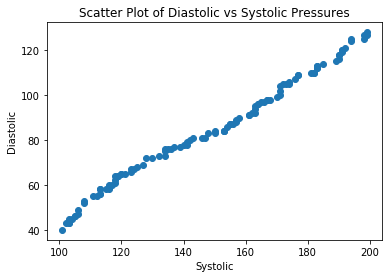

In [2]:
plt.scatter(X,y)
plt.title('Scatter Plot of Diastolic vs Systolic Pressures')
plt.xlabel('Systolic')
plt.ylabel('Diastolic')

## Creating our Linear Regression Function

In [3]:
def coefficient_estimator(x, y):
    '''Our implementation of the linear regression algorithm'''
    # Determine the size of the dataset
    n = np.size(x)
    
    # Find the mean value of X and y
    mean_x, mean_y = np.mean(x), np.mean(y)
    
    # Determine the deviations from y (cross-deviation) and
    # determining the deviations from x
    SS_xy = np.sum(x * y - n * mean_x * mean_y)
    SS_xx = np.sum(x * x - n * mean_x * mean_x)
    
    # Calculate the coefficients
    b_1 = SS_xy / SS_xx
    b_0 = mean_y - b_1 * mean_x
    
    return (b_0, b_1)

def plot_estimator(X, y, title='', xlabel='', ylabel=''):
    '''plot_estimator() allows you to compute the linear regression and plot the 
    original data as a scatter plot with the predicted line on top'''
    # Determine the coefficients using the previous function
    # and determine the predicted values
    b = coefficient_estimator(X,y)
    pred = b[0] + b[1] * X

    #Plot the data and give it a title
    plt.scatter(X,y)
    plt.plot(X,pred, c = 'c')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Print the equation of best fit
    print('Regression line: {:.4f} + {:.4f}*X'.format(*b))

### Fit and plot our Blood Pressure Datas

Regression line: 0.0127 + 0.5677*X


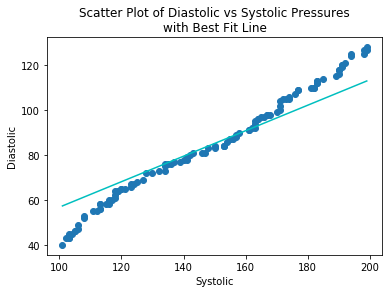

In [4]:
plot_estimator(X,
               y,
               title = 'Scatter Plot of Diastolic vs Systolic Pressures\nwith Best Fit Line',
              xlabel='Systolic',
              ylabel='Diastolic')

## Using another dataset

Poverty data from [Penn State's Stats Class](https://onlinecourses.science.psu.edu/stat462/node/101/)

In [5]:
poverty_data = pd.read_csv('poverty.csv', '\t')

poverty_pct = poverty_data['PovPct']
viol_crim = poverty_data['ViolCrime']
teen_birth = poverty_data['TeenBrth']
poverty_data.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


### Fit and plot the poverty percentages versus the violent crime rates and versus the teen birth rates

The units for the violent crime rates and teen birth rates are assumed from the textual context on the PSU website since they're not given.

Regression line: 0.0104 + 0.5980*X


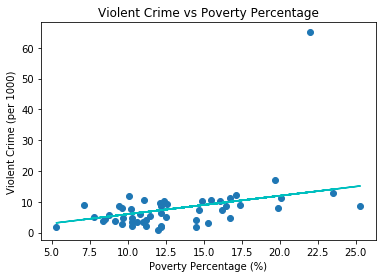

In [6]:
plot_estimator(poverty_pct,
               viol_crim,
               title = 'Violent Crime vs Poverty Percentage',
              xlabel='Poverty Percentage (%)',
              ylabel='Violent Crime (per 1000)')

Regression line: -0.0327 + 3.2228*X


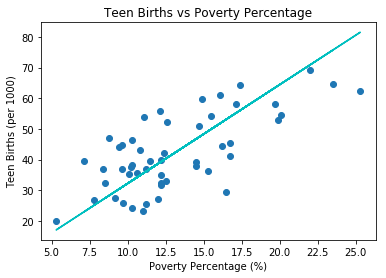

In [7]:
plot_estimator(poverty_pct,
               teen_birth,
               title = 'Teen Births vs Poverty Percentage',
              xlabel='Poverty Percentage (%)',
              ylabel='Teen Births (per 1000)')